# 1. Linear Regression

### 가상의 데이터로 예측하기

In [1]:
from sklearn.datasets import make_regression

-  Scikit-Learn의 datasets 서브패키지는 회귀분석용 가상 데이터를 생성하는 명령어인 make_regression()을 제공한다.
- make_regression()으로 만들어진 데이터는 종속 변수 y의 값이 독립변수 x 벡터의 선형 조합인 선형관계를 가진다.

In [7]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 10, noise = 15)
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]

In [8]:
print('input data :\n{}, \n\n output data :\n{}'.format(data[0][-10:], data[1][-10:]))

input data :
[[ 1.29954498]
 [-0.05284539]
 [-1.19767207]
 [ 0.22469659]
 [ 0.52307352]
 [ 0.14644743]
 [-0.75343164]
 [-0.52163899]
 [-0.17142232]
 [-0.27328722]], 

 output data :
[ 95.05341213   8.67274462 -69.33490916  -8.54141279  71.01508676
  42.63127143 -48.70878001 -10.61049942  22.33695854   5.97228956]


- n_samples : 기본값은 100, 표본 데이터의 갯수, 정수  
- n_features : 기본값은 100, 독립변수의 수(차원), 정수  
- n_target : 기본값은 1, 종속변수의 수, 정수  
- bias = 기본값은 0.0, y절편, 실수   
- noise = 기본값은 0.0, 분포 

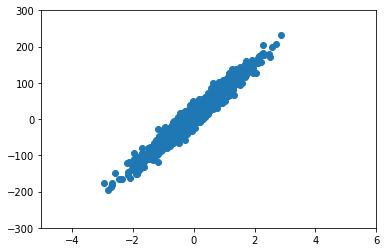

In [11]:
# 위에서 생성한 가상 데이터 셋을 그래프위에 그려 보았습니다.
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(data[0], data[1])
plt.xlim(-5, 6)
plt.ylim(-300, 300)
plt.show()

#### 선형 모델을 만들어 보자.

In [12]:
from sklearn.model_selection import train_test_split
# train_test_split은 데이터를 학습용 데이터와 검증용 데이터로 분리시켜줍니다.

X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size = 0.2, shuffle = True)

# 생성한 가상의 데이터를 훈련용 데이터와 검증 데이터로 나눠주는 과정입니다.

- train_test_split(data, data2, test_size, train_size, shuffle, random_state)  
  data: 독립변수 데이터  
  data2: 종속변수 데이터 (data 인수에 종속변수가 포함되어 있다면 생략해도 된다.)  
  test_size: 검증용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다. (기본값은 0.25)  
  train_size : 학습용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다.(test_size와 train_size 중 하나만 사용)  
  shuffle: 데이터를 섞어준다. (기본값은 True)  
  random_state: 난수를 생성해준다.

In [13]:
# 선형회귀(Linear Regression)

from sklearn.linear_model import LinearRegression
# LinearRegression을 import 합니다.

hypothesis = LinearRegression()
# import한 LinearRegression을 model이라는 변수에 대입한다.
# 굳이 별도의 변수에 넣어주지 않고 LinearRegression() 으로 사용해도 무방합니다. 여기서는 설명을 위해 변수에 대입하였습니다.

# model에는 W1 * X1 + W0 (선형회귀의 기본 Hypothesis)가 생략되어 있습니다.

In [ ]:
# model = LinearRegression().fit(X_train, y_train)

#### 생성한 모델을 학습시켜보자.

In [15]:
model_linear = hypothesis.fit(X_train, y_train)
# fit()은 모델을 학습시키는 명령입니다.

# cost = avg((model - y)**2) 생략된 코드입니다. (예측값에서 결과값을 뺀 평균 즉, cost를 구하는 것)
# for i in range(10000):
#     gradDecent(cost)  구한 cost값을 이용해서 gradient Descent 실행
# 생략된 과정들이 fit()안에 들어 있습니다.

In [19]:
model_linear.coef_

array([71.9010027])

In [18]:
hypothesis.coef_

array([71.9010027])

#### 생성한 모델의 weight(가중치, 계수)와 bias를 출력해보자.

In [20]:
model_linear.coef_
# coef_ 속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열입니다.
# 우리가 생성한 데이터에는 입력 특성이 하나이므로 하나만 출력됩니다.
# coef_ 는 weight값을 보여줍니다.

array([71.9010027])

In [21]:
model_linear.intercept_
# intercept_ 속성은 항상 실수 값 하나입니다.
# intercept_ 는 bias(y 절편)값을 보여줍니다.

9.849628458752363

#### 우리가 생성한 모델을 검증 해보자.

- score()로 모델을 검증할 수 있다.

In [22]:
print("train data score : {:.2f}".format(model_linear.score(X_train, y_train)))
print("test data score : {:.2f}".format(model_linear.score(X_test, y_test)))

train data score : 0.95
test data score : 0.96


In [ ]:
#Trainset data 와 함께, Hypothesis (직선) 시각화해보기
#Testset data 와 함께, Hypothesis (직선) 시각화해보기

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
# 회귀 평가 지표인 mean squared error, R2 score를 불러옵니다.

y_predict = model_linear.predict(X_test)
# predcit() 명령어를 사용하여 y값을 예측합니다.

In [24]:
mse = mean_squared_error(y_test, y_predict)
# 실제 값과 예측값을 이용하여 mean squared error를 측정합니다.

In [25]:
import numpy as np
rmse = np.sqrt(mse)
# root mean squared error를 측정할 수 있습니다.
# sqrt는 루트를 씌워주는 명령어입니다.

In [26]:
print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))

MSE : 218.383, RMSE : 14.778


In [27]:
print('test data score : {:.2f}'.format(r2_score(y_test, y_predict)))
# 실제값과 직접 만들어본 예측값을 이용하여 모델의 성능을 측정할 수 있습니다.

test data score : 0.96


- score(X_test, y_test)를 실행하게 되면 내부함수에서 X_test를 이용하여 예측값을 생성합니다. 그 후 생성된 예측값과 y_test(실제값)을 이용하여 성능을 검증해줍니다.  
- 모델의 성능만을 측정할때는 위의 번거러운 과정없이 score함수만을 활용하면 됩니다.

## 선형회귀 모델 시각화

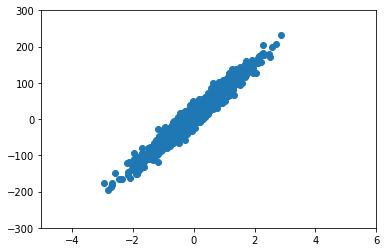

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(data[0], data[1])
plt.xlim(-5, 6)
plt.ylim(-300, 300)
plt.show()

In [ ]:
# 선형회귀 모델
[ # 데이터의 개수 (행)
    [-0.333], # features 개수 (열)
    [-0.111]
]

In [ ]:
# weight가 data별로 곱해져야 하기 때문에
# 

In [34]:
graph_x = np.linspace(data[0].min()-0.5, data[0].max()+0.5, 2)
[-3.43675703, 3.37481882] # 이것을
[ # 데이터의 개수
    [-3.43675703], # feature 개수
    [3.37481882],
]
graph_y = model_linear.predict(graph_x.reshape(-1, 1))

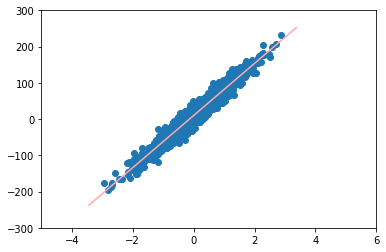

In [43]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(data[0], data[1])
plt.plot(graph_x, graph_y, color='#faa')
plt.xlim(-5, 6)
plt.ylim(-300, 300)
plt.show()

#### Linear Regression with Multi-Variable

앞에서는 1개의 특성(feature)을 가진 데이터 셋으로 선형회귀를 해보았다. 지금부터는 여러개의 특성을 가진 데이터 셋으로 션형회귀를 해보자.

In [44]:
X_multi, y_multi = make_regression(n_samples = 1000, n_features = 100, bias = 10, noise = 50)

print('input data : \n{}, \n\n output data : \n{}'.format(X_multi[:1], y_multi[:1]))

input data : 
[[-2.54417922e+00  9.58328116e-01  2.32571630e-01  5.86198838e-01
   1.76132151e+00  1.24409589e-01 -1.07373108e+00 -3.93872305e-01
  -1.19898162e+00 -1.72687898e+00 -4.90847260e-01 -1.55118484e-01
   1.26719514e+00 -6.29728987e-01 -5.80505311e-01  4.96084797e-01
   1.66683645e+00  1.61847904e+00 -1.18775524e-01  8.99404827e-01
  -9.16993606e-01 -5.11610681e-01 -5.82200831e-02  1.44742814e+00
   1.67120264e+00  4.02155006e-01  5.19874459e-01 -3.78929048e-01
  -3.96255531e-01 -3.32364116e+00  5.66328372e-01  2.12860552e+00
  -8.55400903e-01  1.13179370e+00 -6.03917685e-01  3.97504494e-03
  -1.67056834e+00  2.69727456e-01  1.49959441e-01  4.14889973e-01
   4.69381425e-01 -2.23111387e+00 -9.64997780e-01 -1.57126811e-01
   9.29400422e-01  1.50396881e+00  9.44520844e-01 -5.80405267e-01
  -7.08827005e-01 -1.57781443e+00 -1.61297023e+00 -1.46318124e-01
  -7.92908886e-01 -9.72060277e-01  1.15017814e-01  6.24172933e-01
  -3.41766847e-02 -1.80319560e-01 -8.07187188e-01 -3.14223844e

여기서는 input data를 살펴보도록 하자.  
1개의 input data에 100개의 각각 다른 값들이 들어있다. 그 이유는 n_features = 100, 즉 100개의 특성을 가지고 있는 데이터이다.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.3, shuffle = True)
# 생성한 가상의 데이터를 학습용과 검증용으로 나눠줍니다.

In [46]:
hypothesis_multi = LinearRegression()
# hypothesis = W0 + W1 * X1 + W2 * X2 + ... + W10 * X10
# weight의 값은 10개 bias는 11개로 구성되어 있다.

In [47]:
model_linear_multi = hypothesis_multi.fit(X_train, y_train)
# 모델을 학습시킵니다.

In [48]:
print('weight : \n{}\n\n'.format(model_linear_multi.coef_))
print('bias : \n{}'.format(model_linear_multi.intercept_))

weight : 
[ 1.16619038e+00  2.53417629e+00 -4.51263768e+00  3.56036240e+01
  6.46470817e+00  2.01859014e+00 -5.70864021e-01 -2.24067399e+00
 -1.16283383e+00  3.47686914e-01  2.95662537e+00  7.97707763e+01
  4.94250121e+01 -4.49225362e-01 -1.00408530e+00  8.33070742e+01
 -1.84791806e+00 -2.38117646e+00 -7.54514120e-01  2.49638356e+00
 -4.16769963e+00 -6.12349876e-01  6.98980937e+01  3.82970391e+00
  2.59849415e+00  3.83864226e+01  2.71300802e+00 -3.92146658e+00
 -1.36230132e-01  3.08013175e+00  1.60308257e+00  8.38833871e-01
  9.31547818e-01 -2.82940332e+00  2.24618214e+00  2.08569821e+00
 -2.39260220e+00 -1.40182472e+00  4.15600623e+01 -1.11357675e+00
  4.08663677e+00 -6.41321489e-01  4.20587527e-01 -3.42586550e+00
  4.22271266e+00  1.97161660e+01  1.35836003e-01  1.22160023e+00
  2.40950612e+00  1.46722411e+00 -1.27228165e+00 -2.61666849e+00
 -2.23781408e-01 -1.11608501e-01 -1.76325456e+00 -6.32249574e-01
 -5.74744522e-01 -2.11822440e+00  7.30098766e-01 -4.62519099e-01
  4.27945252e-0

In [49]:
print('학습 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_test, y_test)))

학습 데이터 점수 : 0.94
검증 데이터 점수 : 0.88


noise = 100

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_2,y_2 = make_regression(n_samples = 1000, n_features = 1, bias = 10, noise = 100)

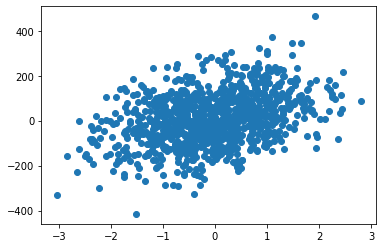

In [61]:
from matplotlib import pyplot as plt
plt.scatter(X_2, y_2)
plt.show()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2, 
                                                    shuffle = True)
hypothesis_noise100 = LinearRegression()
model_linear_noise100 = hypothesis_noise100.fit(X_train, y_train)

In [63]:
print('weight : \n{}\n\n'.format(model_linear_noise100.coef_))
print('bias : \n{}'.format(model_linear_noise100.intercept_))

weight : 
[44.41134125]


bias : 
11.766550283233112


In [64]:
print('학습 데이터 점수 : {:.2f}'.format(model_linear_noise100.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_linear_noise100.score(X_test, y_test)))

학습 데이터 점수 : 0.14
검증 데이터 점수 : 0.14


make_regression을 이용해 가상 데이터를 생성할 때 noise의 값에 따른 결과를 보여주고 있다.

### 보스턴 주택데이터 예측하기

In [76]:
# from sklearn.datasets import load_boston

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
data, target

### Deprecated

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

In [ ]:
boston['data']

In [ ]:
boston['target']

In [ ]:
boston['feature_names']

In [ ]:
boston['data'].shape, boston['target'].shape

### Use

In [69]:
train_test_split?

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.2,
                                                    shuffle=True)

In [71]:
LinearRegression?

In [72]:
from sklearn.linear_model import LinearRegression

hypothesis = LinearRegression()

model_boston = hypothesis.fit(X_train, y_train)

print('learning finished..')
print('coef_: {}'.format(model_boston.coef_))
print()
print('bias: {}'.format(model_boston.intercept_))

learning finished..
coef_: [-1.28693192e-01  4.83828539e-02  2.31474469e-02  2.31398307e+00
 -1.79035269e+01  3.51343234e+00 -1.58693071e-03 -1.44986694e+00
  3.76267081e-01 -1.28583334e-02 -9.92737135e-01  8.81712326e-03
 -5.74714895e-01]

bias: 39.72767541509342


In [73]:
model_boston.score(X_train, y_train), model_boston.score(X_test, y_test)

(0.7265992187830543, 0.7691748733732722)

In [74]:
model_boston.predict(X_test)

array([33.472793  ,  8.29660582, 30.98658249, 29.4716087 ,  7.34090752,
       16.61191686, 28.99740843, 20.40063343, 13.53270001, 24.54572476,
       24.35463823, 24.01508505, 13.27073348, 20.27628293, 24.99965598,
       17.65979203,  7.9307916 , 22.6879255 , 31.03588112, 37.88720756,
       22.42465413, 18.78431525, 15.59145644, 21.48418638, 12.60807614,
       13.485649  , 31.95885148, 17.83991287, 17.96917402, 19.39838713,
       16.61453106, 24.77261321, 34.78231854, 33.72828373, 22.87666397,
       20.44772312, 11.83430068, 19.70686963, 24.46374961, 23.67245061,
       34.78700781, 14.76892287, 22.34905523, 20.89074106, 18.68674116,
       40.64770786, 27.51345721, 22.11946283, 15.74657234, 28.85574877,
       21.05385253, 29.7164045 , 16.3973431 , 33.84315007, 33.38181763,
       35.67085764, 29.88418279, 13.43940615, 12.81465583, 35.24327033,
       18.20954518, 17.60336816, 28.38000715, 14.7965928 , 23.08883107,
       29.41348276, 12.1524076 , 20.8362744 , 20.84117803, 13.09